In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from influxdb import *
#import Config as cg
import datetime
from influxdb import DataFrameClient
import csv


In [2]:
# INFLUX_DB_IP = '10.12.97.178'
# INFLUX_DB_PORT = 8086
# INFLUX_DB = 'demoDb'
# TARGET_MEASUREMENT = 'EM_live'

In [3]:
# con_obj = InfluxDBClient(host=INFLUX_DB_IP, port=INFLUX_DB_PORT, database=INFLUX_DB)
# query = 'select * from ' + TARGET_MEASUREMENT + ' where time > now() - 2d '
# df = pd.DataFrame(con_obj.query(query, chunked=True, chunk_size=10000).get_points())
# df['time'] = df['time'].astype('datetime64[ns]')
# #df['time'] = df['time'] + datetime.timedelta(hours=5, minutes=30)

In [4]:
df = pd.read_excel (r'C:\Users\u22v09\Desktop\dataa.xlsx')


In [5]:
df['time'] = df['time'].astype('datetime64[ns]')
df.head()

,DeviceID,EM_Active Power (kW),EM_Current Avg (A),EM_Current Ph1 (A),EM_Current Ph2 (A),EM_Current Ph3 (A),EM_Energy (kWh),EM_Frequency (Hz),EM_Power Factor,EM_THD Current1,...,EM_Voltage Ph3-N (V),Mean_THD,SCS,imbalance_current,imbalance_volt,mean_current,mean_volt,mean_voltage,temp_rise,time
0,EM6,0.0,0.1,0.1,0.0,0.1,269038.0,50.0,0.0,0.0,...,228.2,0.000000,0,50.000000,0.219613,0.066667,394.633333,227.833333,0.096460,2020-06-09 21:01:21.590003968
1,EM1,674.7,901.0,911.3,878.5,913.3,600103.0,49.9,0.9,4.1,...,251.9,3.866667,1,1.361400,0.405913,901.033333,435.233333,251.266667,0.329530,2020-06-09 21:01:21.638971136
2,EM4,237.2,384.4,383.8,382.3,387.1,162689.0,50.0,0.9,0.0,...,228.1,2.200000,1,0.702393,0.236606,384.400000,394.466667,227.733333,0.111965,2020-06-09 21:01:22.002703872
3,EM5,228.0,360.5,379.8,345.4,356.4,208800.0,50.0,0.9,7.6,...,227.9,9.000000,1,5.343935,0.067608,360.533333,394.433333,227.733333,0.009142,2020-06-09 21:01:22.284264960
4,EM3,0.0,0.0,0.0,0.0,0.0,2680.0,49.9,1.0,0.0,...,252.0,0.000000,0,0.000000,0.382848,0.000000,435.333333,251.333333,0.293146,2020-06-09 21:01:22.289259008


In [6]:
list(df.columns)

['DeviceID',
 'EM_Active Power (kW)',
 'EM_Current Avg (A)',
 'EM_Current Ph1 (A)',
 'EM_Current Ph2 (A)',
 'EM_Current Ph3 (A)',
 'EM_Energy (kWh)',
 'EM_Frequency (Hz)',
 'EM_Power Factor',
 'EM_THD Current1',
 'EM_THD Current2',
 'EM_THD Current3',
 'EM_THD Voltage',
 'EM_TOTAL_Export_Energy(kWh)',
 'EM_TOTAL_Import_Energy(kWh)',
 'EM_Voltage Ph1-N (V)',
 'EM_Voltage Ph1-Ph2 (V)',
 'EM_Voltage Ph1-Ph3 (V)',
 'EM_Voltage Ph2-N (V)',
 'EM_Voltage Ph2-Ph3 (V)',
 'EM_Voltage Ph3-N (V)',
 'Mean_THD',
 'SCS',
 'imbalance_current',
 'imbalance_volt',
 'mean_current',
 'mean_volt',
 'mean_voltage',
 'temp_rise',
 'time']

In [7]:
len(df)
df['diff'] = abs(df.groupby('DeviceID')['EM_TOTAL_Import_Energy(kWh)'].diff())
df = df.fillna(0)
#main[['DeviceID','EM_TOTAL_Import_Energy(kWh)','diff']]





In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [9]:
df1=df[['diff','time','DeviceID','EM_Active Power (kW)', 'EM_Frequency (Hz)', 'EM_Power Factor', 'EM_THD Voltage','Mean_THD', 'EM_TOTAL_Import_Energy(kWh)','mean_current','mean_volt','mean_voltage']]

main=df1[df1['DeviceID']=='EM1']



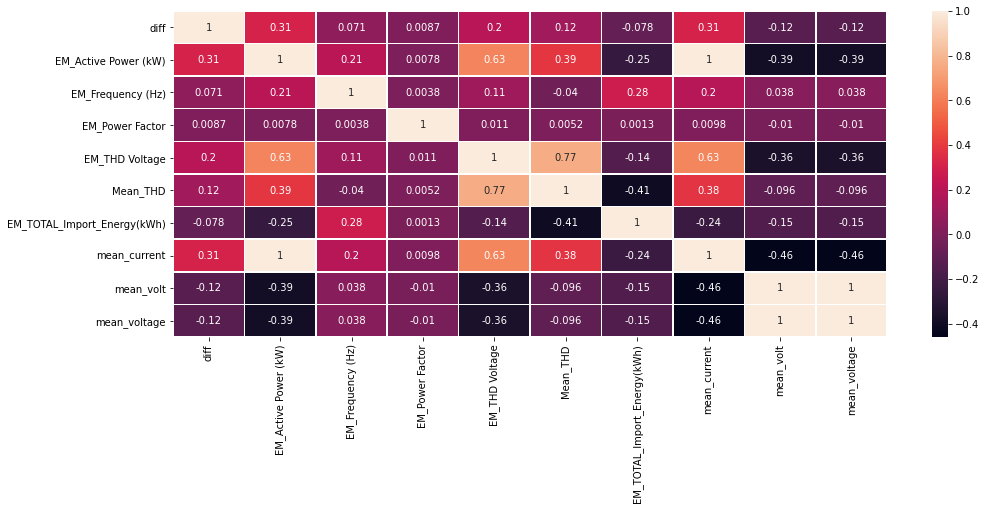

In [10]:
df_corr=main.drop(['time','DeviceID'],axis=1)

corr = df_corr.corr()
plt.figure(figsize=(16, 6)) 
sns.heatmap(corr,linewidths=.5,annot=True)

In [11]:
# df1=df1[df1['DeviceID']=='EM22']
# len(df1)

In [12]:
X=main.drop([ 'EM_TOTAL_Import_Energy(kWh)','time','DeviceID','diff'],axis=1)
Y=main[['EM_TOTAL_Import_Energy(kWh)']]

In [13]:
len(X)

33191

In [14]:
X_train,X_test, y_train,y_test = train_test_split(X , Y, random_state=20, test_size=0.2)


In [15]:
# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_predicted = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)


In [17]:
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[  341.12056048 32973.43949779 44837.67842769  6569.85926285
  -2898.80300927  -257.05777644 -3010.33804116  3600.84384715]]
Intercept: [-915705.33341436]
Root mean squared error:  24950090.394632306
R2 score:  0.48775355962521283


In [18]:
import statsmodels.api as sm

sm.OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     EM_TOTAL_Import_Energy(kWh)   R-squared (uncentered):                   1.000
Model:                                     OLS   Adj. R-squared (uncentered):              1.000
Method:                          Least Squares   F-statistic:                          1.640e+07
Date:                         Fri, 12 Jun 2020   Prob (F-statistic):                        0.00
Time:                                 10:09:39   Log-Likelihood:                     -2.6455e+05
No. Observations:                        26552   AIC:                                  5.291e+05
Df Residuals:                            26544   BIC:                                  5.292e+05
Df Model:                                    8                                                  
Covariance Type:                     nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
EM_Active Power (kW)   377.5575      6.733     56.078      0.000     364.361     390.754
EM_Frequency (Hz)     1.735e+04    206.573     83.976      0.000    1.69e+04    1.78e+04
EM_Power Factor      -7.753e+04   9913.051     -7.821      0.000    -9.7e+04   -5.81e+04
EM_THD Voltage        7013.0651    137.021     51.182      0.000    6744.497    7281.633
Mean_THD             -3106.6686     40.502    -76.703      0.000   -3186.055   -3027.282
mean_current          -282.5980      4.853    -58.235      0.000    -292.110    -273.086
mean_volt            -3267.8237    940.317     -3.475      0.001   -5110.894   -1424.753
mean_voltage          3940.3031   1628.258      2.420      0.016     748.831    7131.775
==============================================================================
Omnibus:                      195.055   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.689
Skew:                           0.202   Prob(JB):                     2.64e-44
Kurtosis:                       3.133   Cond. No.                     5.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# All Device ID's 

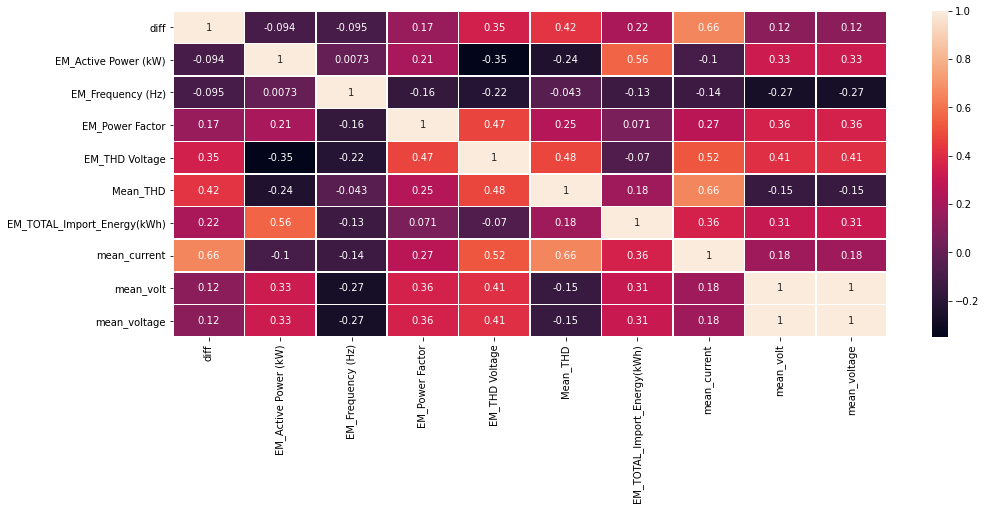

In [19]:
df_corr=df1.drop(['time','DeviceID'],axis=1)

corr = df_corr.corr()
plt.figure(figsize=(16, 6)) 
sns.heatmap(corr,linewidths=.5,annot=True)

In [20]:
X=df1.drop([ 'EM_TOTAL_Import_Energy(kWh)','time','DeviceID','diff'],axis=1)
Y=df1[['EM_TOTAL_Import_Energy(kWh)']]

In [21]:
len(X)

397277

In [22]:
X_train,X_test, y_train,y_test = train_test_split(X , Y, random_state=20, test_size=0.2)


In [23]:
# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_predicted = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)


In [25]:
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[ 5.09982788e+00 -2.93711089e+05 -1.27960194e+05 -5.76659411e+04
   2.12075897e+04  1.84127324e+02 -4.31582275e+04  8.02268169e+04]]
Intercept: [13566059.04901647]
Root mean squared error:  17392715307.648483
R2 score:  0.5720578307841497


In [26]:
x = pd.DataFrame(df1.groupby(['DeviceID'])['EM_TOTAL_Import_Energy(kWh)'].apply(lambda x:x.iloc[-1]-x.iloc[0]))
x

,EM_TOTAL_Import_Energy(kWh)
DeviceID,
EM1,22049.0
EM10,1132.4
EM2,0.0
EM22,37.1
EM23,409.1
EM3,0.0
EM4,6406.0
EM5,7441.0
EM6,9.0


In [27]:
x[1:].sum()

EM_TOTAL_Import_Energy(kWh)    18014.8
dtype: float64

In [28]:
# x = pd.DataFrame(df1.groupby(['DeviceID'])['EM_TOTAL_Export_Energy(kWh)'].apply(lambda x:x.iloc[-1]-x.iloc[0]))
# x

In [29]:
df1.groupby('DeviceID')['EM_TOTAL_Export_Energy(kWh)'].describe()

KeyError: 'Column not found: EM_TOTAL_Export_Energy(kWh)'